In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

#import csv and define the data path.
file_path = 'final_data.csv'
all_star_data = pd.read_csv(file_path)
all_star_data.head()


,first,last,team,year,games_played,min,fgm,fga,fg3m,fg3a,...,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
0,Julius,Erving,PHI,1980,82.0,35:02:00,9.68,18.59,0.05,0.22,...,8.01,4.44,2.62,1.73,3.40,2.84,24.56,0.521,0.220,0.787
1,Eddie,Johnson,ATL,1980,75.0,35:55:00,7.64,15.16,0.08,0.32,...,2.39,5.47,1.54,0.11,2.70,2.53,19.08,0.504,0.249,0.784
2,Artis,Gilmore,CHI,1980,81.0,34:31:00,6.67,9.93,0.00,0.00,...,10.06,2.15,0.77,2.43,3.31,3.58,17.89,0.672,0.000,0.706
3,Reggie,Theus,CHI,1980,81.0,34:20:00,6.58,13.38,0.22,1.09,...,3.56,5.41,1.73,0.28,3.65,3.14,18.84,0.492,0.203,0.808
4,Larry,Bird,BOS,1980,82.0,39:30:00,8.77,18.33,0.24,0.92,...,10.91,5.50,2.61,0.84,3.69,2.91,21.23,0.478,0.266,0.863


In [2]:

#Creates a dataframe with player names and their number of All-Star appearances.
all_star_counts = all_star_data.groupby(['first', 'last']).size().reset_index(name='all_star_appearances')

#ranks the players with the most all-star appearances.
most_all_star_appearances = all_star_counts[all_star_counts['all_star_appearances'] == all_star_counts['all_star_appearances'].max()]
most_all_star_appearances


,first,last,all_star_appearances
178,LeBron,James,19


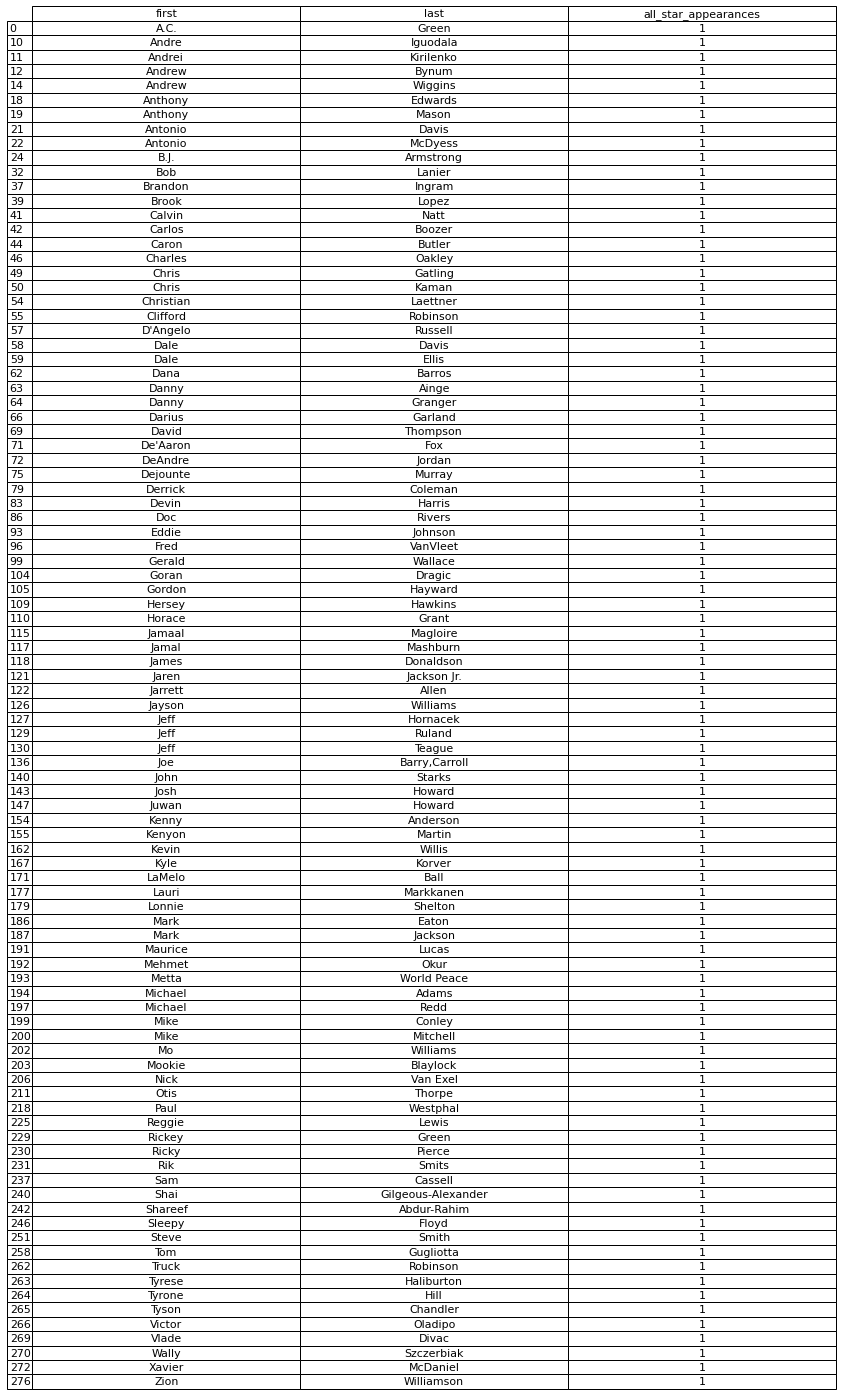

In [3]:
#Identifies the players who had only one All-Star appearance.

one_time_all_stars = all_star_counts[all_star_counts['all_star_appearances'] == 1]
one_time_all_stars

fig, ax = plt.subplots(figsize=(12, 4)) 
ax.axis('tight')
ax.axis('off')


One_table = table(ax, one_time_all_stars, loc='center', cellLoc='center')

One_table.auto_set_font_size(False)
One_table.set_fontsize(11)
One_table.scale(1.2, 1.2) 
plt.savefig('one_time_all_stars.png', dpi=300, bbox_inches='tight')


In [4]:

#we need to calculate the average points per game for each player's all-star career.
career_avg_pts = all_star_data.groupby(['first', 'last'])['pts'].mean().reset_index(name='career_avg_pts')

#Finds the player with the highest career scoring average per all-star years.
highest_scoring_player = career_avg_pts[career_avg_pts['career_avg_pts'] == career_avg_pts['career_avg_pts'].max()]
highest_scoring_player


,first,last,career_avg_pts
240,Shai,Gilgeous-Alexander,31.27
